In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np


In [56]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))
# 0.14.1

The scikit-learn version is 0.24.2.


this code is from the youtube channel 'Stats Wire'--- https://www.youtube.com/watch?v=TMzaK2-K5C4

In [3]:
df = pd.read_csv("./data/cleaned_reviews.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  20026 non-null  object
 1   scores        20026 non-null  int64 
 2   review_title  20026 non-null  object
 3   reviews       20019 non-null  object
 4   like          20026 non-null  bool  
 5   brand         20026 non-null  object
 6   gender        20026 non-null  object
 7   rev_len       20026 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 1.1+ MB


In [4]:
train, test = train_test_split(df, train_size=0.3, random_state=123, stratify=df['like'])

In [5]:
X_train = train[['review_title', 'reviews']]
y_train = train['like']

In [6]:
X_test = test[['review_title', 'reviews']]
y_test = test['like']

In [11]:
X_train

,review_title,reviews
7347,too snug,i returned the shirt i am pounds normally we...
9563,runs small,it is small for an xl quality is what you exp...
16701,oversize shirt,i get these to wear to bed i havent washed one...
6897,incredible value,my husband’s goto shirt for lounging or exerci...
8408,great value and quality will buy more,there is a reason these shirts have great revi...
...,...,...
6319,good choice,good quality and fit as intended great for cas...
1804,excellent value,i wanted just plain gray ls shirts and these a...
522,not exactly egyptian cotton but for the price ...,star only because they are not made of egyptia...
7413,meh,not sure what makes this perfect i felt like a...


## TF-IDF on titles 

In [21]:
vect_title = TfidfVectorizer()
train_vect_title = vect_title.fit_transform(X_train['review_title'])
test_vect_title = vect_title.transform(X_test['review_title'])

In [24]:
lr_title= LogisticRegression(random_state=123, penalty='l2')
model_title = lr_title.fit(train_vect_title, y_train)


In [27]:
pred_title_test = model_title.predict_proba(test_vect_title)[::,1]

In [28]:
roc_auc_score(y_test, pred_title_test)

0.9072810663640474

In [29]:
feature_names_title = np.array(vect_title.get_feature_names())
sorted_coef_index = model_title.coef_[0].argsort()

In [30]:
print("smallest Coef", feature_names_title[sorted_coef_index[:20]])

smallest Coef ['not' 'poor' 'too' 'shrunk' 'thin' 'disappointed' 'rough' 'cheap'
 'horrible' 'waste' 'terrible' 'fake' 'beware' 'small' 'pay' 'short' 'no'
 'shrinks' 'smaller' 'scratchy']


In [31]:
print("largest Coef", feature_names_title[sorted_coef_index[:-21:-1]])

largest Coef ['great' 'perfect' 'comfortable' 'nice' 'good' 'comfy' 'best' 'excellent'
 'love' 'soft' 'well' 'exactly' 'awesome' 'true' 'price' 'tee' 'comfort'
 'fitted' 'favorite' 'husband']


## TF-IDF on titles && removing stopwords 

In [7]:
%store -r all_stopwords

In [8]:
vect_title_stopwords = TfidfVectorizer(stop_words = all_stopwords)
train_vect_title_stopwords = vect_title_stopwords.fit_transform((X_train['review_title']))
test_vect_title_stopwords = vect_title_stopwords.transform(X_test['review_title'])
# vect_title_stopwords_tf_train = vect_title_stopwords.fit_transform(X_train['review_title'])

In [23]:
lr_title_stopwprds= LogisticRegression(random_state=123, penalty='l2')
model_title_stopwords = lr_title_stopwprds.fit(train_vect_title_stopwords, y_train)


In [18]:
pred_title_stopwords_test = model_title_stopwords.predict_proba(test_vect_title_stopwords)[::,1]

In [20]:
roc_auc_score(y_test, pred_title_stopwords_test)

0.9043693293195875

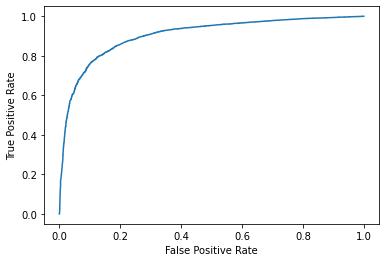

In [19]:
#define metrics
# pred_title_stopwords_train = model_title_stopwords.predict_proba(X_train_vectorized)[::,1]
# y_pred_proba = log_regression.predict_proba(X_)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_title_stopwords_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
feature_names_title_stopwords = np.array(vect_title_stopwords.get_feature_names())
sorted_coef_index = model_title_stopwords.coef_[0].argsort()

In [33]:
print("smallest Coef", feature_names_title_stopwords[sorted_coef_index[:20]])

smallest Coef ['not' 'poor' 'too' 'shrunk' 'thin' 'waste' 'rough' 'disappointed'
 'horrible' 'cheap' 'terrible' 'fake' 'beware' 'pay' 'small' 'wash'
 'garbage' 'short' 'shrinks' 'itchy']


In [34]:
print("largest Coef", feature_names_title_stopwords[sorted_coef_index[:-21:-1]])

largest Coef ['great' 'perfect' 'comfortable' 'nice' 'good' 'excellent' 'comfy' 'best'
 'love' 'exactly' 'soft' 'well' 'awesome' 'husband' 'price' 'favorite'
 'true' 'go' 'comfort' 'fitted']


In [39]:
type(X_train['reviews'].iloc[0])

str

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007 entries, 7347 to 16235
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_title  6007 non-null   object
 1   reviews       6006 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [41]:
vect_reviews = TfidfVectorizer()
train_vect_reviews = vect_reviews.fit_transform((X_train['reviews'].values.astype('U')))
test_vect_reviews = vect_reviews.transform(X_test['reviews'].values.astype('U'))
lr_reviews= LogisticRegression(random_state=123, penalty='l2')
model_reviews = lr_reviews.fit(train_vect_reviews, y_train)
pred_reviews_test = model_reviews.predict_proba(test_vect_reviews)[::,1]
roc_auc_score(y_test, pred_reviews_test)

0.9072941866488421

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_reviews_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
feature_names_reviews = np.array(vect_reviews.get_feature_names())
sorted_coef_index = model_reviews.coef_[0].argsort()

In [44]:
print("smallest Coef", feature_names_reviews[sorted_coef_index[:20]])

smallest Coef ['not' 'small' 'return' 'disappointed' 'rough' 'shrunk' 'were' 'returned'
 'poor' 'way' 'uncomfortable' 'even' 'sizes' 'same' 'washed' 'received'
 'cheap' 'returning' 'okay' 'smaller']


In [45]:
print("largest Coef", feature_names_reviews[sorted_coef_index[:-21:-1]])

largest Coef ['great' 'perfect' 'love' 'comfortable' 'well' 'good' 'nice' 'he' 'price'
 'exactly' 'soft' 'perfectly' 'loves' 'little' 'expected' 'excellent'
 'best' 'right' 'shrink' 'am']
